# 일변량 연속형 자료 요약

#### 일변량 연속형 자료에 대해 기술통계량(descriptive statistics)을 이용한 자료의 요약과 정리는 크게 3가지로 구분할 수 있다.

1. **중심화 경향 (central tendency)**
> 산술평균, 중앙값, 최빈값, 기하평균, CAGR, 조화평균, 가중편균
2. **퍼짐 정도 (dispersion)**
> 분산, 표준편차, 변이계수, 범위, IQR, 백분위수
3. **분포형태와 대칭정도 (distribution)**
> 왜도, 첨도, 분위수-분위수

### 산술통계량(descriptive statistics)
<img src="images/Picture2.png" />

### 1. 중심화 경향에 대해 통계 이론과 활용상의 주의점

In [2]:
cars = pd.read_csv("data/Cars93.csv")

In [3]:
cars = pd.DataFrame(cars)

In [4]:
type(cars)

pandas.core.frame.DataFrame

Format
This data frame contains the following columns:

Manufacturer
- Manufacturer.

Model
- Model.

Type
- Type: a factor with levels "Small", "Sporty", "Compact", "Midsize", "Large" and "Van".

Min.Price
- Minimum Price (in \$1,000): price for a basic version.

Price
- Midrange Price (in \$1,000): average of Min.Price and Max.Price.

Max.Price
- Maximum Price (in \$1,000): price for “a premium version”.

MPG.city
- City MPG (miles per US gallon by EPA rating).

MPG.highway
- Highway MPG.

AirBags
- Air Bags standard. Factor: none, driver only, or driver & passenger.

DriveTrain
- Drive train type: rear wheel, front wheel or 4WD; (factor).

Cylinders
- Number of cylinders (missing for Mazda RX-7, which has a rotary engine).

EngineSize
- Engine size (litres).

Horsepower
- Horsepower (maximum).

RPM
- RPM (revs per minute at maximum horsepower).

Rev.per.mile
- Engine revolutions per mile (in highest gear).

Man.trans.avail
- Is a manual transmission version available? (yes or no, Factor).

Fuel.tank.capacity
- Fuel tank capacity (US gallons).

Passengers
- Passenger capacity (persons)

Length
- Length (inches).

Wheelbase
- Wheelbase (inches).

Width
- Width (inches).

Turn.circle
- U-turn space (feet).

Rear.seat.room
- Rear seat room (inches) (missing for 2-seater vehicles).

Luggage.room
- Luggage capacity (cubic feet) (missing for vans).

Weight
- Weight (pounds).

Origin
- Of non-USA or USA company origins? (factor).

Make
- Combination of Manufacturer and Model (character).

Details
- Cars were selected at random from among 1993 passenger car models that were listed in both the Consumer Reports issue and the PACE Buying Guide. Pickup trucks and Sport/Utility vehicles were eliminated due to incomplete information in the Consumer Reports source. Duplicate models (e.g., Dodge Shadow and Plymouth Sundance) were listed at most once.

Further description can be found in Lock (1993).

In [5]:
cars = cars.ix[:,1:28] #Unnamed: 불필요 컬럼 제거

In [6]:
cars.tail()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
92,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,Front,...,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


In [7]:
import matplotlib.pyplot as plt

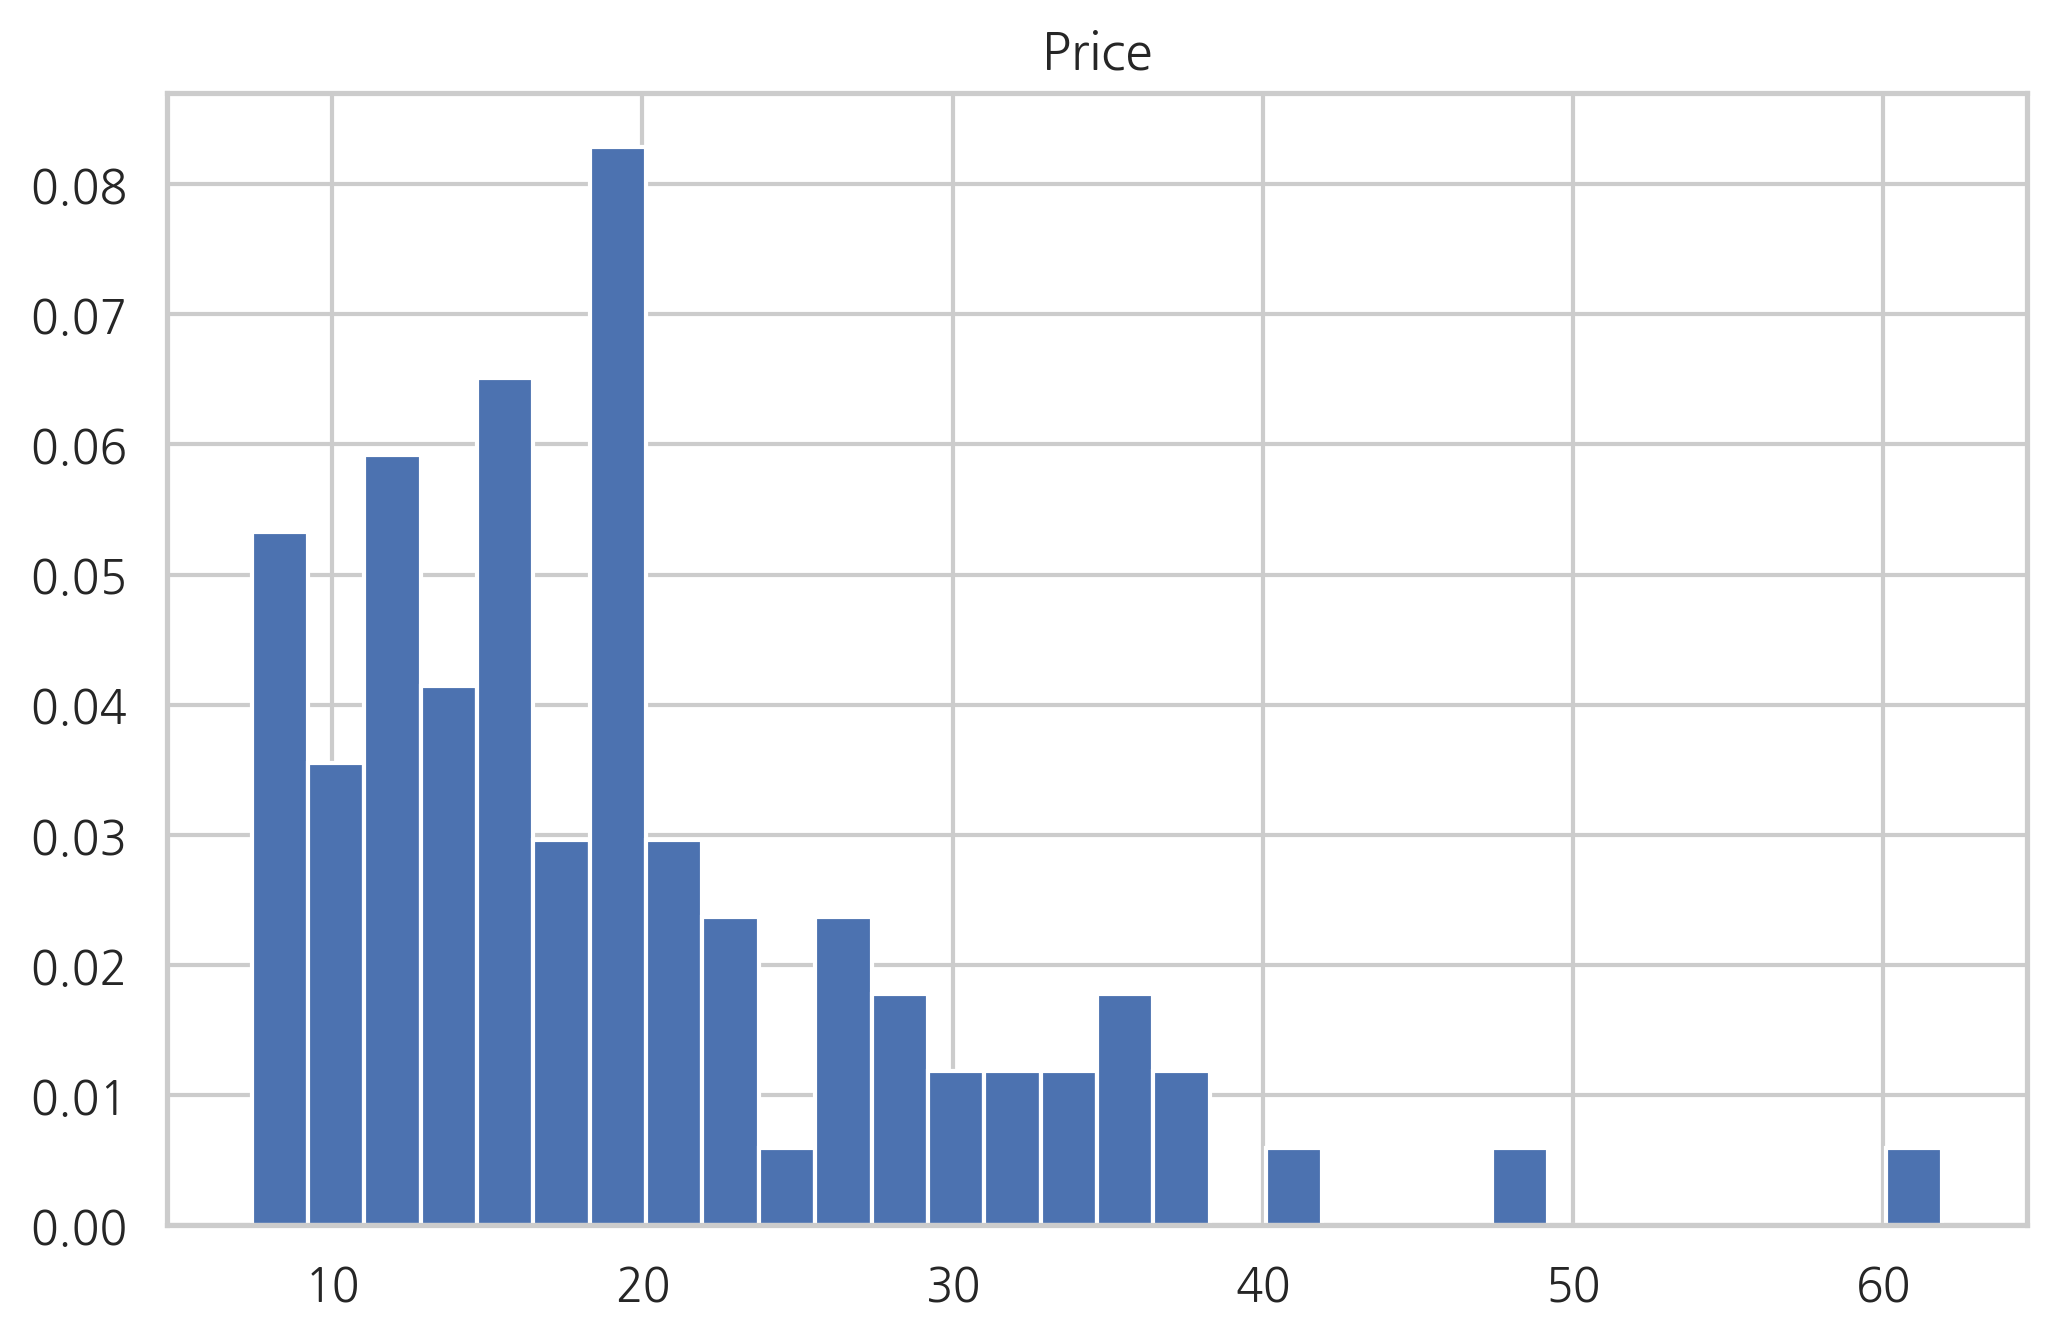

In [11]:
#plt.hist(data=cars, x='MPG.highway', bins=20, density=True)
cars.hist(column='Price', density=True, bins=30)
plt.show()

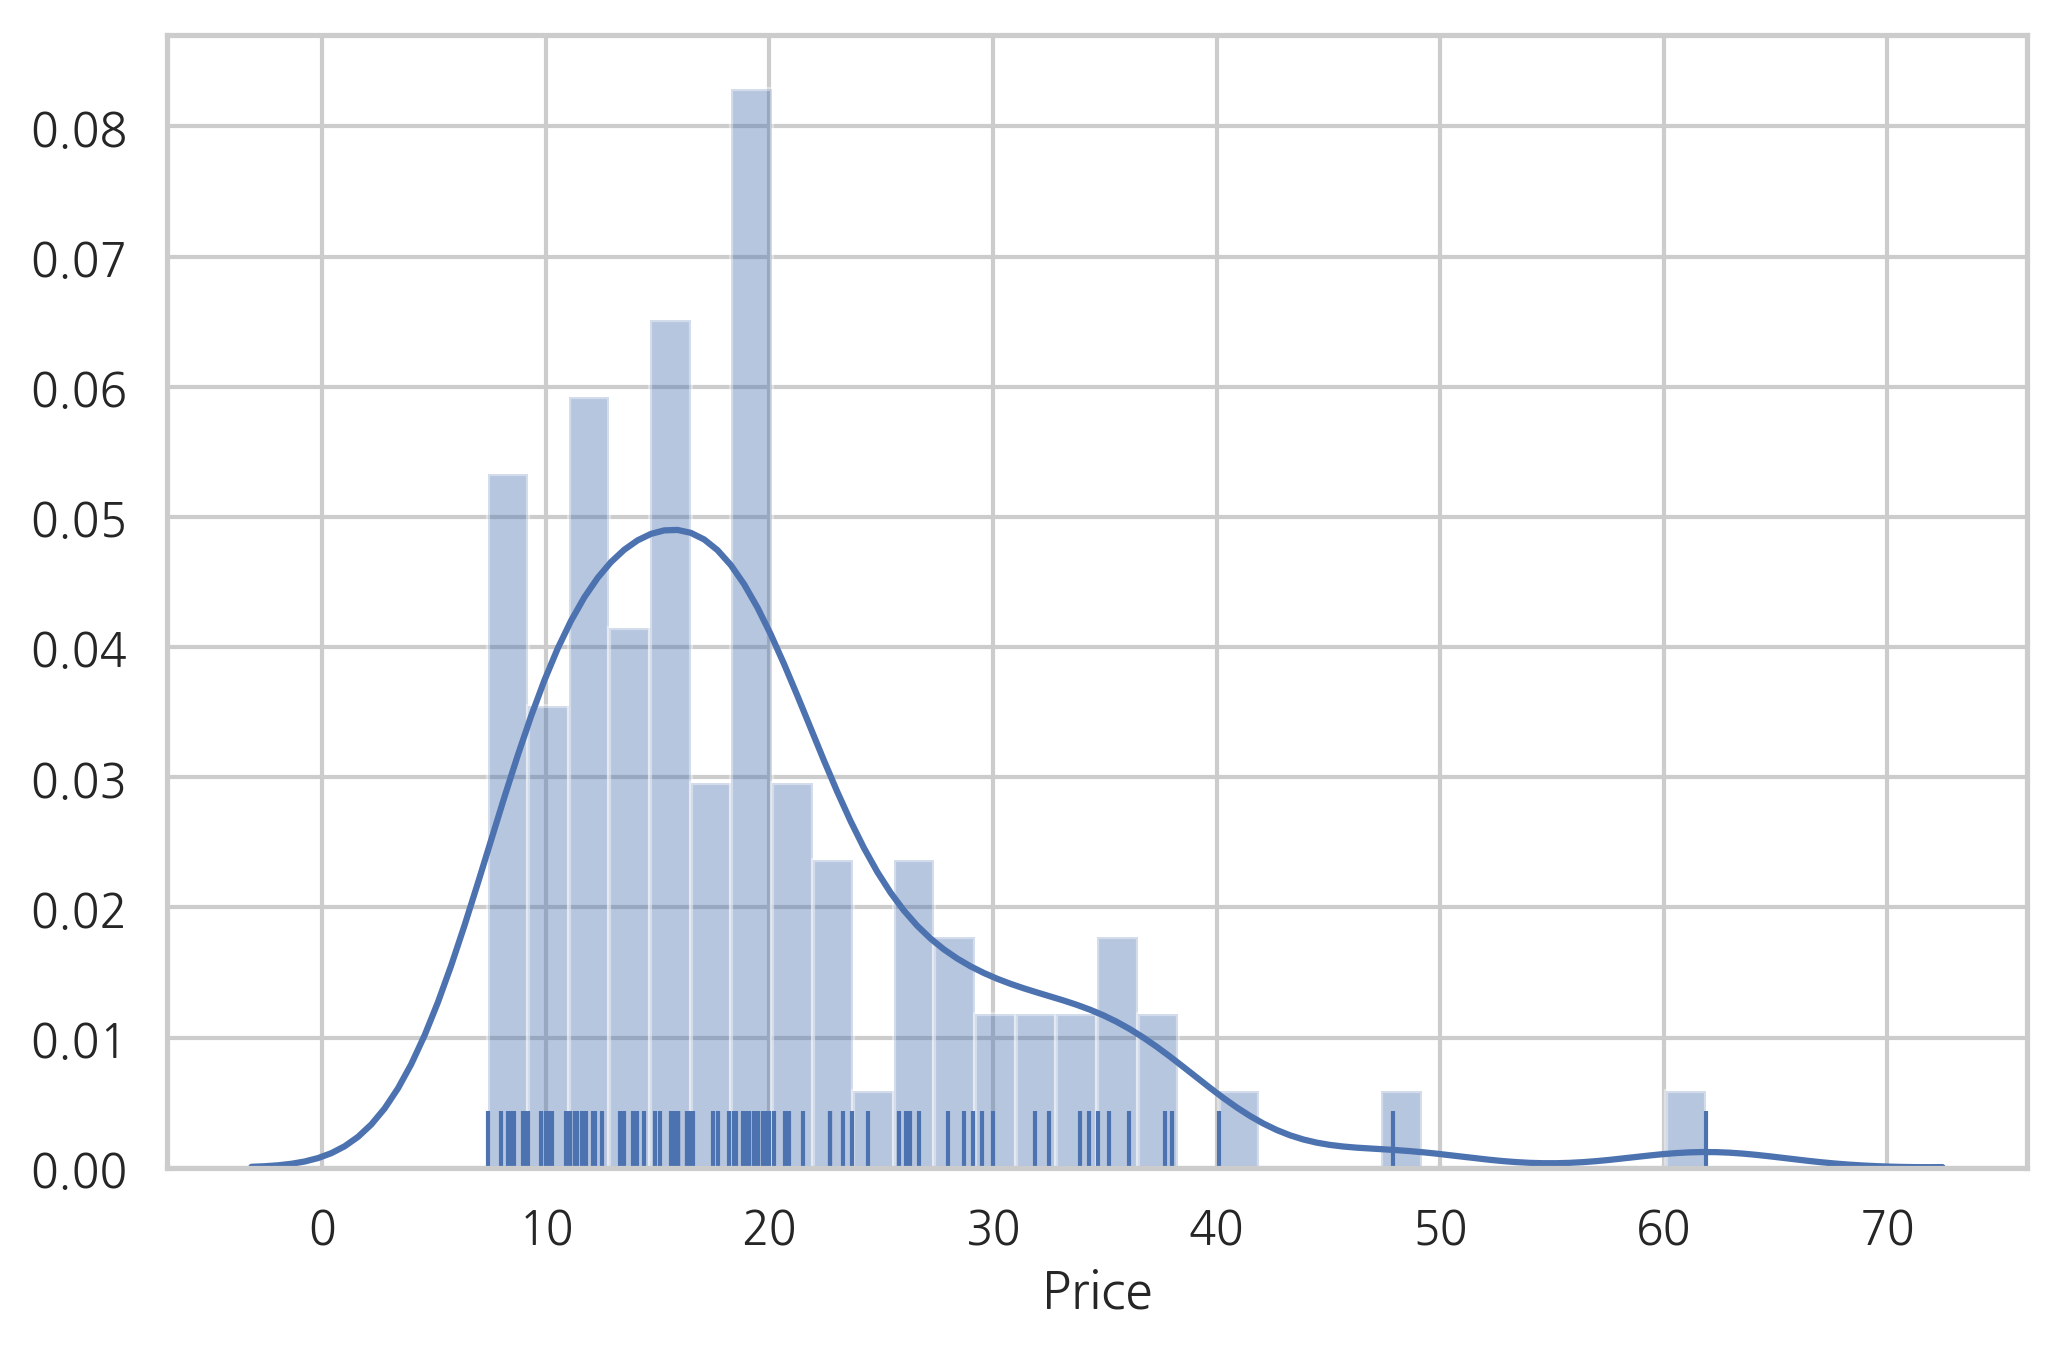

In [16]:
import seaborn as sns
sns.distplot(cars['Price'], bins=30, kde=True, rug=True)
#kde=False를 해주게 되면 y축에 해당 분포에 대한 절대치가 출력된다.
#rug = True로 해줄 시 선분으로 해당 데이터의 위치가 표시된다.

#### Hitogram, Kernel density curve plot 를 보면 Price는 왼쪽으로 치우쳐 있고 오른쪽으로 꼬리가 긴 분포 형태를 띠고 있음을 알 수 있다.

In [69]:
print("Price Mean: {0:.2f} \nPrice Median: {1:.2f}\nPrice Max: {2:.2f}\nPrice Min: {3:.2f}"
      .format(np.mean(cars['Price']), np.median(cars['Price']), 
              np.max(cars['Price']), np.min(cars['Price'])))

Price Mean: 19.51 
Price Median: 17.70
Price Max: 61.90
Price Min: 7.40


>**Seaborn**
- seaborn의 dist 는 matplot의 hist(히스토그램)를 기반으로 하고있다.
- X축은 변수, Y축은 커널 밀도 추정(Kernel Density Estimation)을 거친 정규화된 수치
- Kernel Density Estimation이란 히스토그램을 구한 후 구해진 히스토그램을 정규화하여 확률밀도함수로 사용하는 것. KDE에 대한 자세한 자료는 링크 참조 [Density Estimation - scikit-learn](http://scikit-learn.org/stable/modules/density.html)

###### 히스토그램은 데이터가 연속적으로 이어질때 그린다. 막대그래프는 운동의 종류(축구, 줄넘기, 피구) 처럼 연속적이지 않은 변량을 나타낼때 그리며 막대가 서로 떨어져 있다.

**히스토그램**
- 연속적인 변량을 나타낼 때 주로 사용한다
- 가로축에 계급의 끝값을 쓴다. (가로는 계급, 세로는 도수)
- 막대의 순서를 임의로 바꿀 수 없고, 막대와 막대 사이가 붙어있다.
- 긱 직사각형의 넓이 = 각 계급의 크기 * 그 계급의 도수

**막대그래프**
- 연속적이지 않은 변량을 나타낼때 주로 사용한다.
- 가로축에 수의 값이나 이름을 쓴다.
- 막대의 순서를 바꿀 수 있고, 막대오 막대 사이에 일정한 간격을 둔다.

중심화 경향, 대표값으로 산술평균, 중앙값, 최빈값을 많이 사용하는데 모두 나름의 특징과 한계를 가지고 있다. 따라서 어느 하나의 통계량이 다른 통계량보다 우수하다거나 더 좋다고 말할 수는 없으며 분석 목적, 분석 대상 자료의 특성, 업의 특성 등을 종합적으로 감안하여 조심해서 사용, 해석해야 한다. 그리고 반드시 퍼짐 정도와 분포형태/대칭정도를 나타내는 통계량과 그래프를 병행해서 분석을 해야 왜곡된 해석을 피할 수 있다.

#### (1) 산술평균 (arithmetic mean, average): mean()
<img src='images/Picture1.png' />

- 우리들이 일반적으로 "평균"이라고 말할 때 사용하는 것이 바로 "산술평균(arithmetic mean)" 이다. 평균에는 "산술평균" 말고도 "기하평균", "조화평균", "가중평균" 등 여러 종류가 있다. 산술평균은 모집단이 정규분포를 띠고 있을 때 가장 적합한 중심화 경향 통계량이라고 할 수 있다. 달리 말하면, 분표 형태가 한쪽으로 치우쳐 있다든지, 이상값(outlier)가 있으면 영향을 크게 받으므로 사용에 주의를 요하는 통계량이라고 할 수 있다. 이럴 경우에는 정규분포로 변환을 하거나 이상값(outlier)을 제거한 후에 산술평균을 계산하는 것이 바람직한 조치라고 하겠다.

#### (2) 중앙값 (median): median()
<img src='images/Picture3.png' />

- 중앙값은 이상치(outlier)에 덜 민감(robust)하므로 이번 예제처럼 오른쪽으로 긴 꼬리 부분에 초고가(extremely high price)의 차량이 소수 있는 경우의 분포에는 산술평균ㅂ다 더 적합한 통계량이라고 할 수 있다.

#### (3) 최빈값 (mode)
<img src='images/Picture4.png' />

- 최빈값은 연속형 데이터를 가지고 바로 적용해서는 안되며, 사전에 범주형 데이터로 변환을 한 후에, 도수분포표(frequency distribution table)을 작성해서, 도수가 가장 많은 구간(class)을 선정하면 된다.

In [231]:
cars['Price'].describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [232]:
tmp = cars.copy()

In [233]:
tmp['quantiles'] = None

In [267]:
i = 0
for x in cars['Price']:
    if x >= 5 and x < 10:
        tmp['quantiles'][i] = '05_10'
    elif x >=10 and x < 15:
        tmp['quantiles'][i] = '10_15'
    elif x >=15 and x < 20:
        tmp['quantiles'][i] = '15_20'
    elif x >=20 and x < 25:
        tmp['quantiles'][i] = '20_25'
    elif x >=25 and x < 30:
        tmp['quantiles'][i] = '25_30'
    elif x >=30 and x < 35:
        tmp['quantiles'][i] = '30_35'
    elif x >=35 and x < 40:
        tmp['quantiles'][i] = '35_40'
    elif x >=40 and x < 45:
        tmp['quantiles'][i] = '40_45'
    elif x >=45 and x < 50:
        tmp['quantiles'][i] = '45_50'
    elif x >=50 and x < 55:
        tmp['quantiles'][i] = '50_55'
    elif x >=55 and x < 60:
        tmp['quantiles'][i] = '55_60'
    elif x >=60 and x < 65:
        tmp['quantiles'][i] = '60_65'
    else :
        tmp['quantiles'][i] = '65'
    i = i + 1

        

In [268]:
tmp['dummy'] = 1
tmp.iloc[:,-2:].head()

,quantiles,dummy
0,15_20,1
1,30_35,1
2,25_30,1
3,35_40,1
4,30_35,1


In [269]:
tmp.iloc[:,-2:].groupby('quantiles').count()

,dummy
quantiles,
05_10,10
10_15,23
15_20,28
20_25,11
25_30,8
30_35,6
35_40,4
40_45,1
45_50,1


In [270]:
# reset_index() 함수 없이 그냥 groupby 를 하면 quantiles 의 groupby 항목이 데이터화 되지 않는다.
quan = tmp.iloc[:,-2:].groupby('quantiles').sum().reset_index()
#tmp.iloc[:,-2:].groupby('quantiles').count()

In [266]:
quan.sort_index(level='5_10')

,quantiles,dummy
0,10_15,23
1,15_20,28
2,20_25,11
3,25_30,8
4,30_35,6
5,35_40,4
6,40_45,1
7,45_50,1
8,5_10,10
9,60_65,1


<BarContainer object of 10 artists>

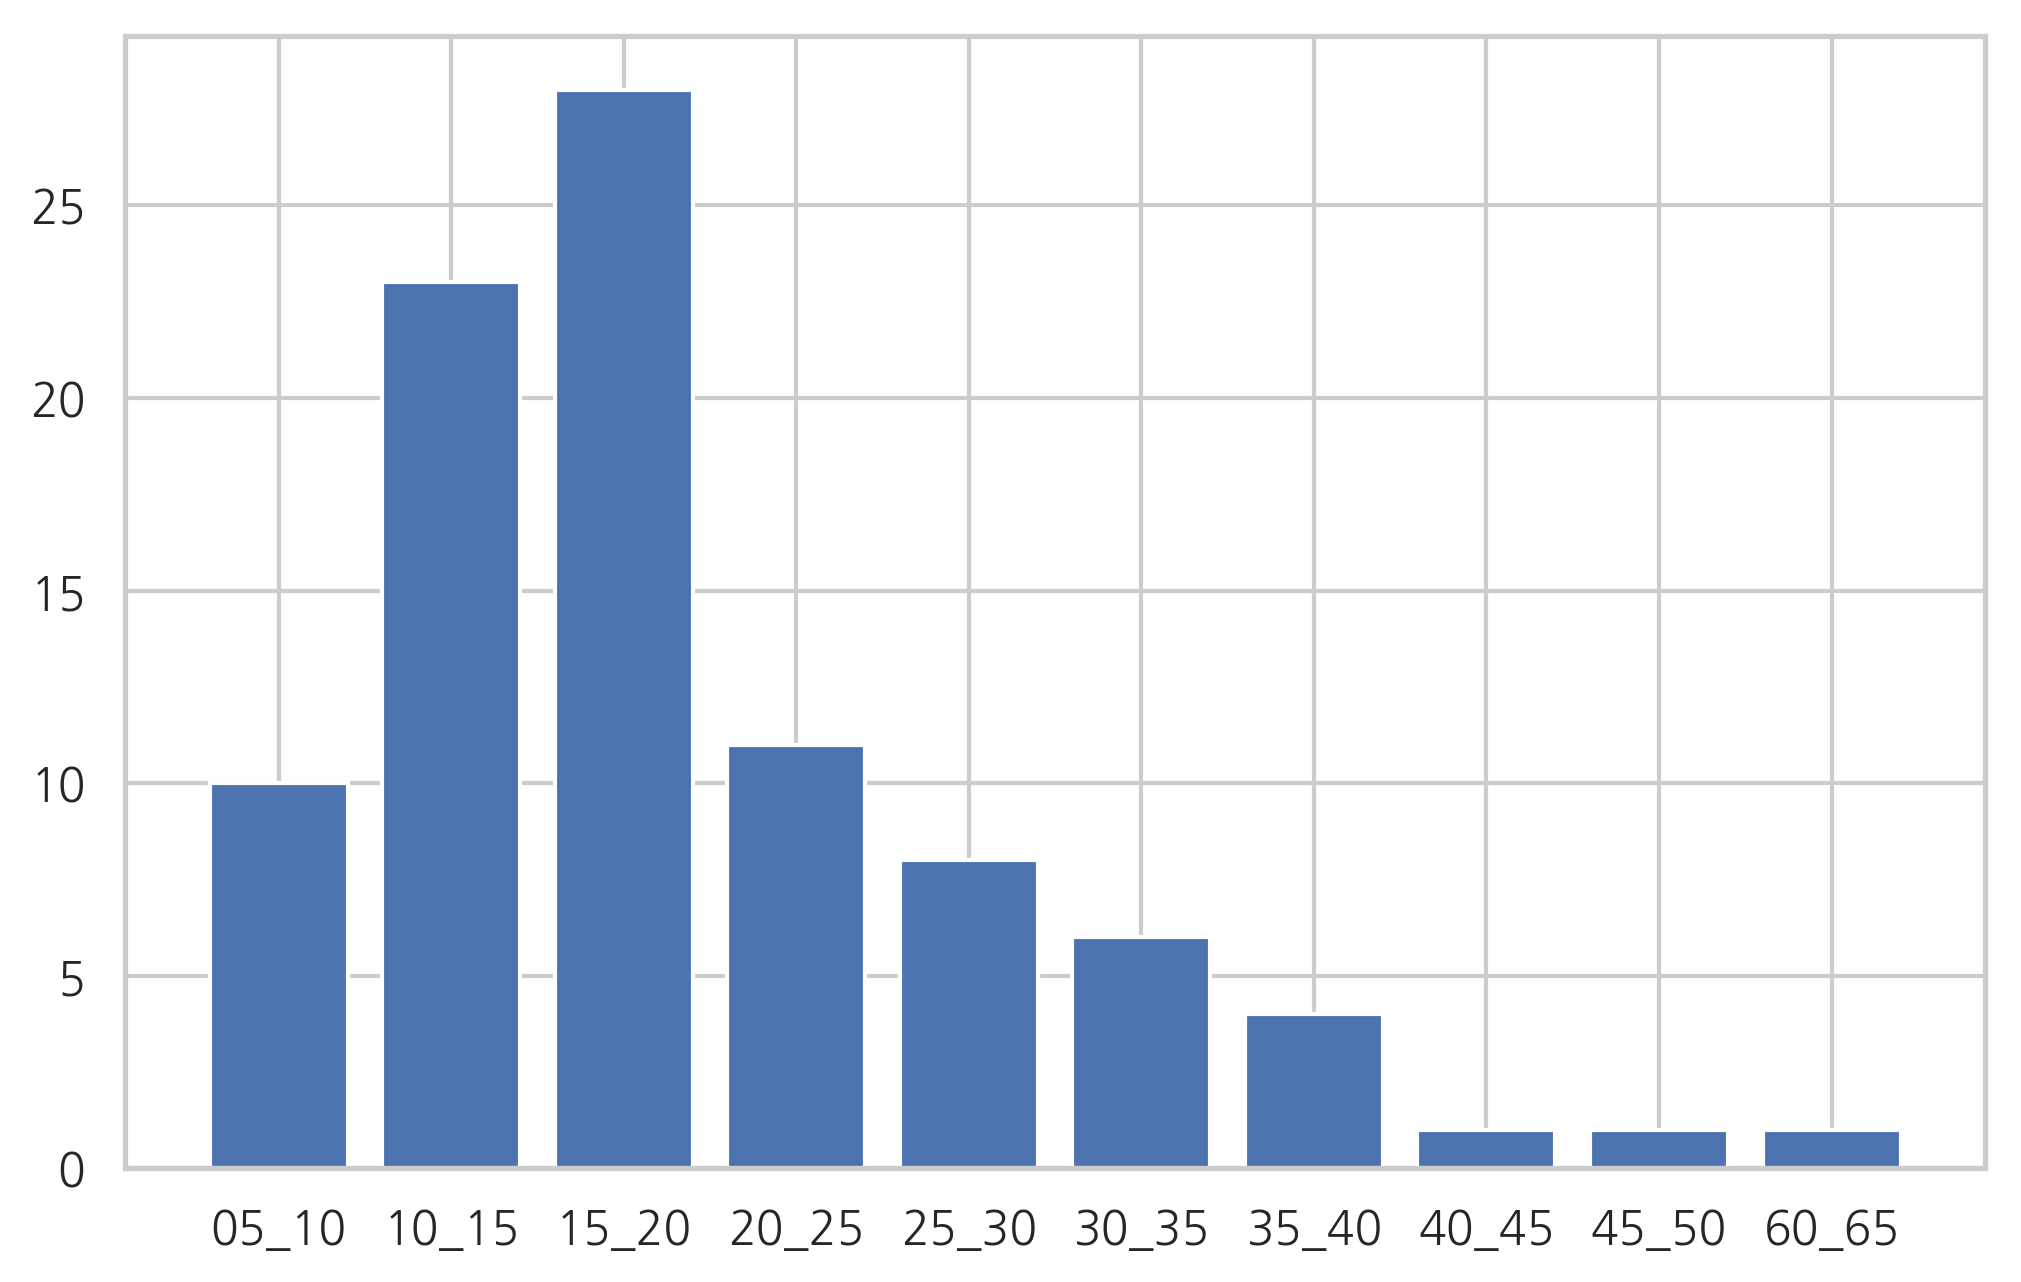

In [271]:
plt.bar(data = quan, x='quantiles', height='dummy')

#### 3번째 구간인 15~20 구간에서 도수가 28개로 가장 많이 나왔으므로, 최빈값은 15~20 구간이 된다.

#### (4) 기하평균(geometric mean)
<img src="images/Picture5.png" />

- 기하평균은 인구성장률, 투자이율과 같은 성장률 평균을 산출할 때 사용한다. 성장률 평균 산출시 산술평균을 사용하면 안된다. 복리개념의 성장률은 면적의 개념으로 접근을 해야 하므로 기하평균을 사용하게 된다.

##### 문제) 작년 이율이 1%, 올해 이율이 5%인 복리정기예금의 2년간 평균 이율은?

In [310]:
x = (1.01*1.05)**(1/2)
x = (x-1) * 100
print('2년간 평균이율: %.4f%%'%x)

2년간 평균이율: 2.9806%


#### (5) 연평균 성장률 (CAGR: componded average growth rate): (FV/IV)^(1/n) - 1
<img src='images/Picture6.png' />

##### 아래 A, B라는 두 회사의 6년간의 매출액과 전년도 대비 성장률을 예로 들어보겠다.

##### 문제 A) A 회사는 2010년도부터 해서 100억, 150억, 190억, 250억, 290억, 350억원의 매출을 올렸습니다. 그러면 이 회사의 6년에 걸친 매출액의 연평균성장률은 얼마일까요? 매년 균등하게 몇 %씩 성장했을까요?


In [327]:
x = (350/100)**(1/5) - 1
x = x * 100
print('매년 균등하게 %.4f%% 씩 성장'%x)

매년 균등하게 28.4735% 씩 성장


<img src='images/Picture7.png' />

#### (6) 조화평균 (harmonic mean): 1/mean(1/x)
<img src='images/Picture8.png' />
- 조화평균은 생산성, 효율 등의 평균산출시에 사용한다.

###### 문제 A) 집에서 학교까지 편도 30km 거리를 갈 때는 시속 30km/h 인 자전거를 타고 갔고, 올 때는 시속 90km/h 인 자동차를 타고 왔을 때 왕복 평균 시속은?
<img src='images/Picture9.png' />

#### 집과 학교까지 왕복은 60 km 이고, 이때 걸린시간은 집에서 학교까지 1시간(30km 거리를 시속 30km/h 로 갔으니까), 학교에서 집까지 걸린시간은 1/3시간(30km 거리를 시족 90km/h로 갔으니까) 총 4/3시간(1시간20분)이 걸렸다.이 시속으로 표시해야하나 총거리 60km / (4/3) = 약 45km/h 이 된다.

In [335]:
x = 60/(4/3)
print('왕복평균시속은 %.d km/h 이다.'%x)

왕복평균시속은 45 km/h 이다.


#### (7) 가중평균(weighted average)
<img src='images/Picture10.png' />
- 가중평균은 확률, 가중치를 수반하는 평균을 산출할 때 사용한다.

##### 문제 A) 홍길동씨가 A, B, C 3개 회사 주식에 각각 700만원, 200만원, 100만원씩 총 1,000만원을 투자하여, 각 회사별로 투자 수익율이 15%, 9%, 5% 나왔다. 그러면 홍길동씨의 주식 투자 평균 수익률은?

<img src='images/Picture11.png' />

In [342]:
x = ((0.7*0.15)+(0.2*0.09)+(0.1*0.05))/(0.7+0.2+0.1)
x = x*100
print('주식 투자 평균 수익률 %.1f%%'%x)

주식 투자 평균 수익률 12.8%


##### 문제 2) 알코올 도수 9%인 와인 200ml와 알코올 도수 21%인 소주 1000ml를 섞어서 와소 폭탄주를 만들었다.  와소 폭탄주의 평균 알코올 도수는?
<img src='images/Picture12.png' />

In [353]:
#weight 를 1로 바꾸지 않고 그냥 써도 무방
x = ((200*0.09)+(1000*0.21))/(200+1000)
x = x*100
print('와소 폭탄주의 평균 알코올 도수는 %d%% 이다.'%x)

와소 폭탄주의 평균 알코올 도수는 19% 이다.


---

### 2. 퍼짐 정도 (dispersion)에 대해 통계 이론과 활용상의 주의점

예제) 아래 3-1반과 3-2반의 수학 점수를 보면 두 학급 모두 평균은 62점으로 같습니다만, 표준편차는 27점 vs. 5.7점으로 매우 다름을 알 수 있습니다.  3-1반은 최우등생과 최열등생이 모여있는 반이고, 3-2반은 비슷한 실력의 중급 학생들이 모여있는 반이라고 하겠습니다.  왜 평균만 보면 안되는지 아셨을 겁니다.

<img src='images/Picture13.png' />
<img src='images/Picture14.png' />

### 산술통계량(descriptive statistics)
<img src="images/Picture15.png" />

In [1]:
cars = pd.read_csv("data/Cars93.csv")

In [2]:
cars = cars.loc[:,('Type','Price')]
#차종(Type), 가격(Price) 변수만 사용

In [3]:
cars.head()

,Type,Price
0,Small,15.9
1,Midsize,33.9
2,Compact,29.1
3,Midsize,37.7
4,Midsize,30.0


In [4]:
cars.groupby('Type').count()

,Price
Type,
Compact,16
Large,11
Midsize,22
Small,21
Sporty,14
Van,9


In [5]:
import seaborn as sns

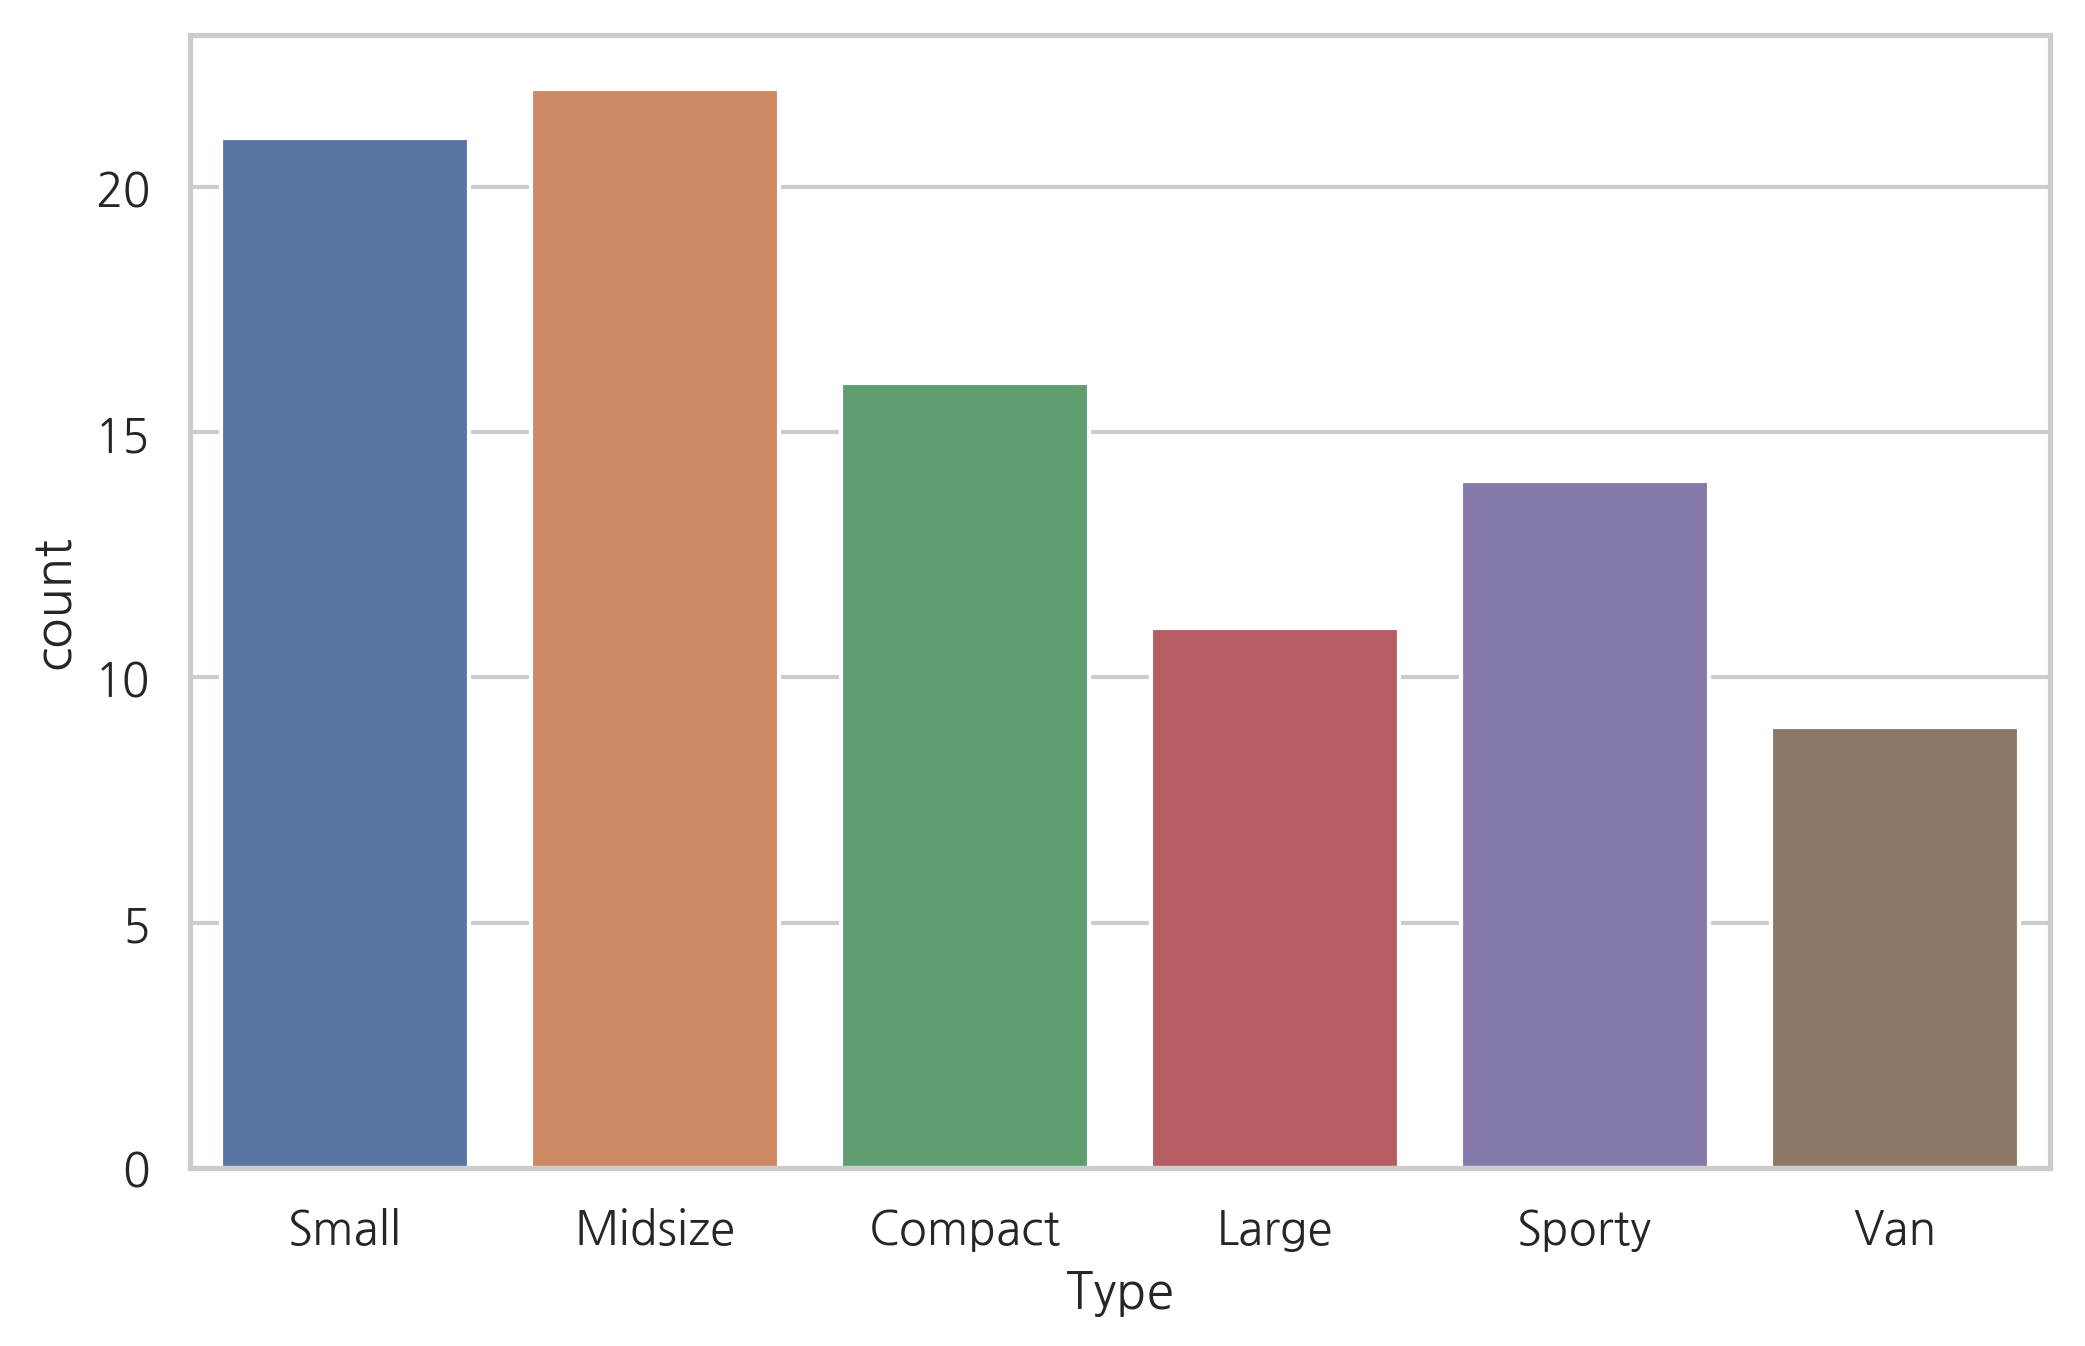

In [6]:
sns.countplot(x='Type', data=cars)

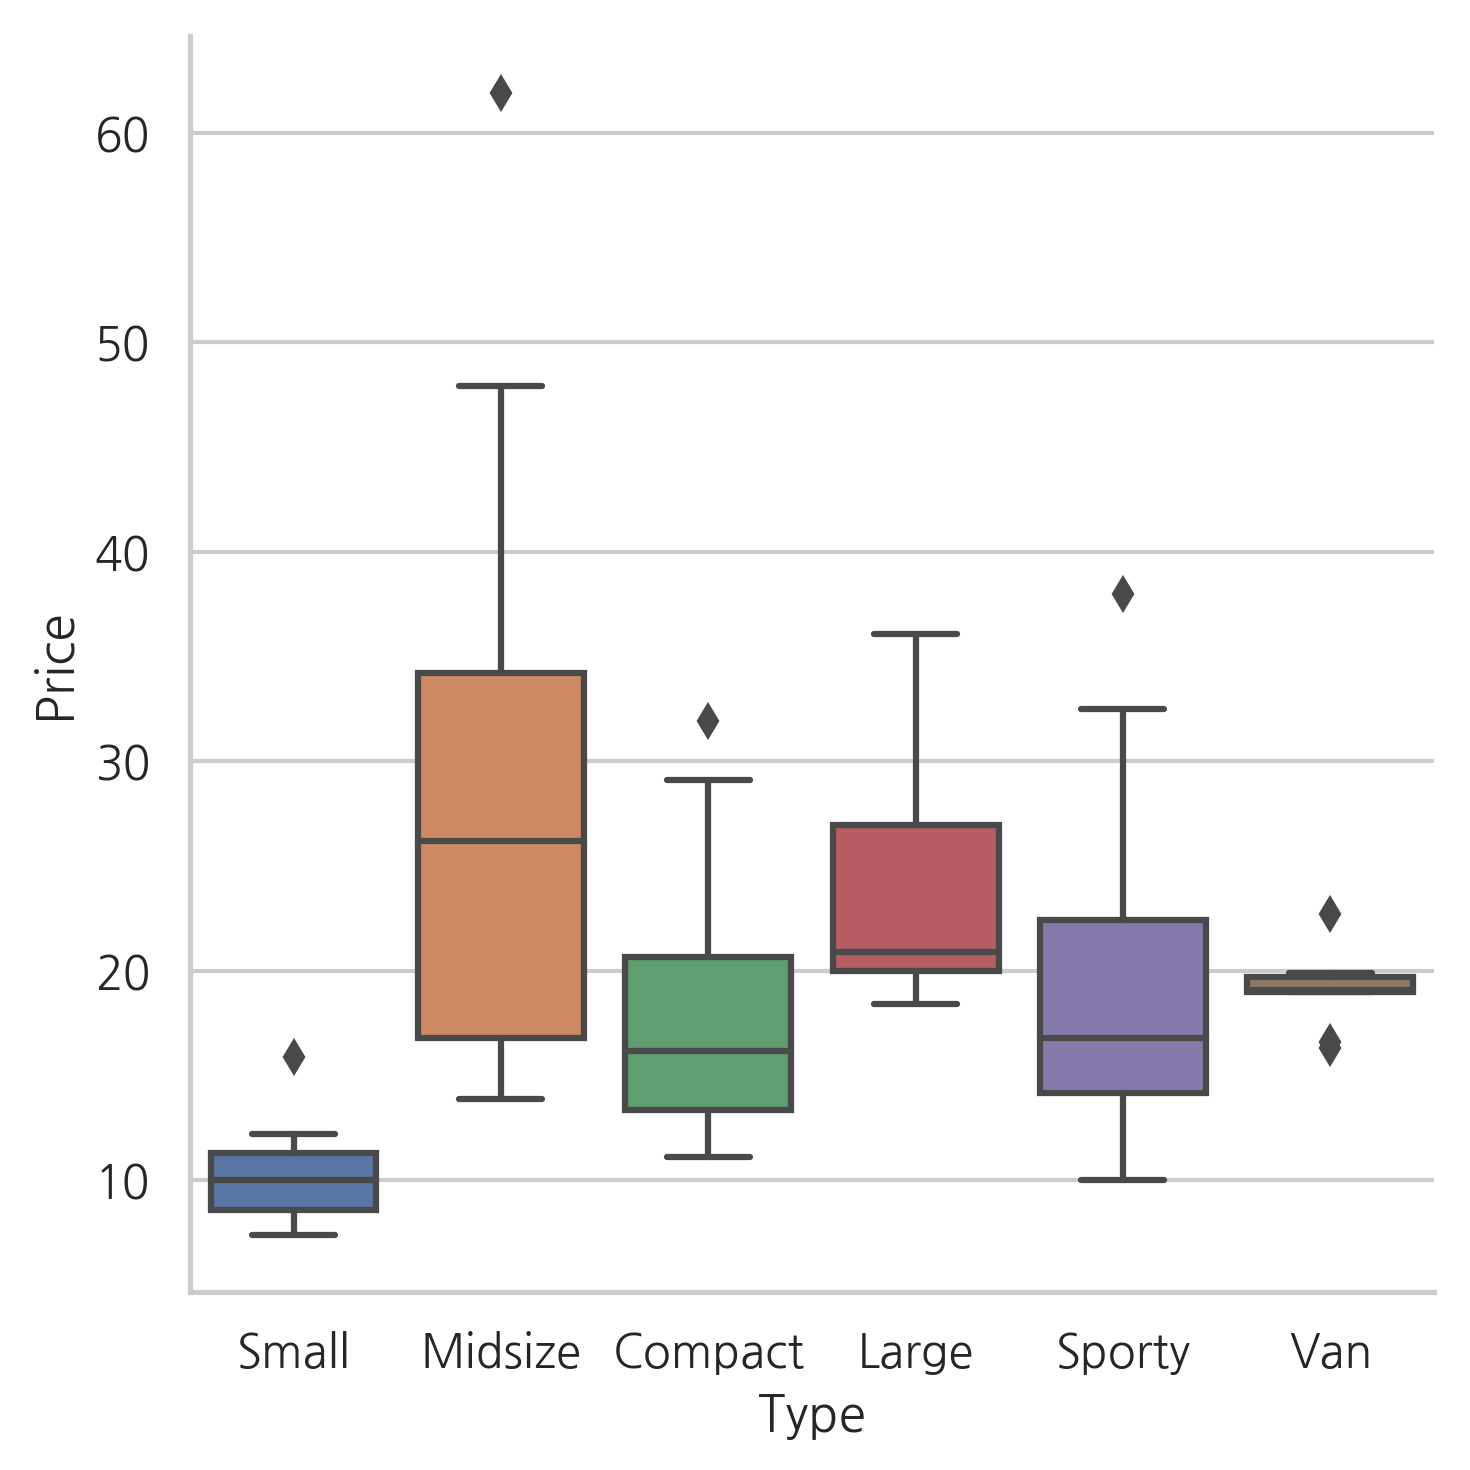

In [7]:
sns.catplot(x='Type', y='Price', data=cars, kind="box")

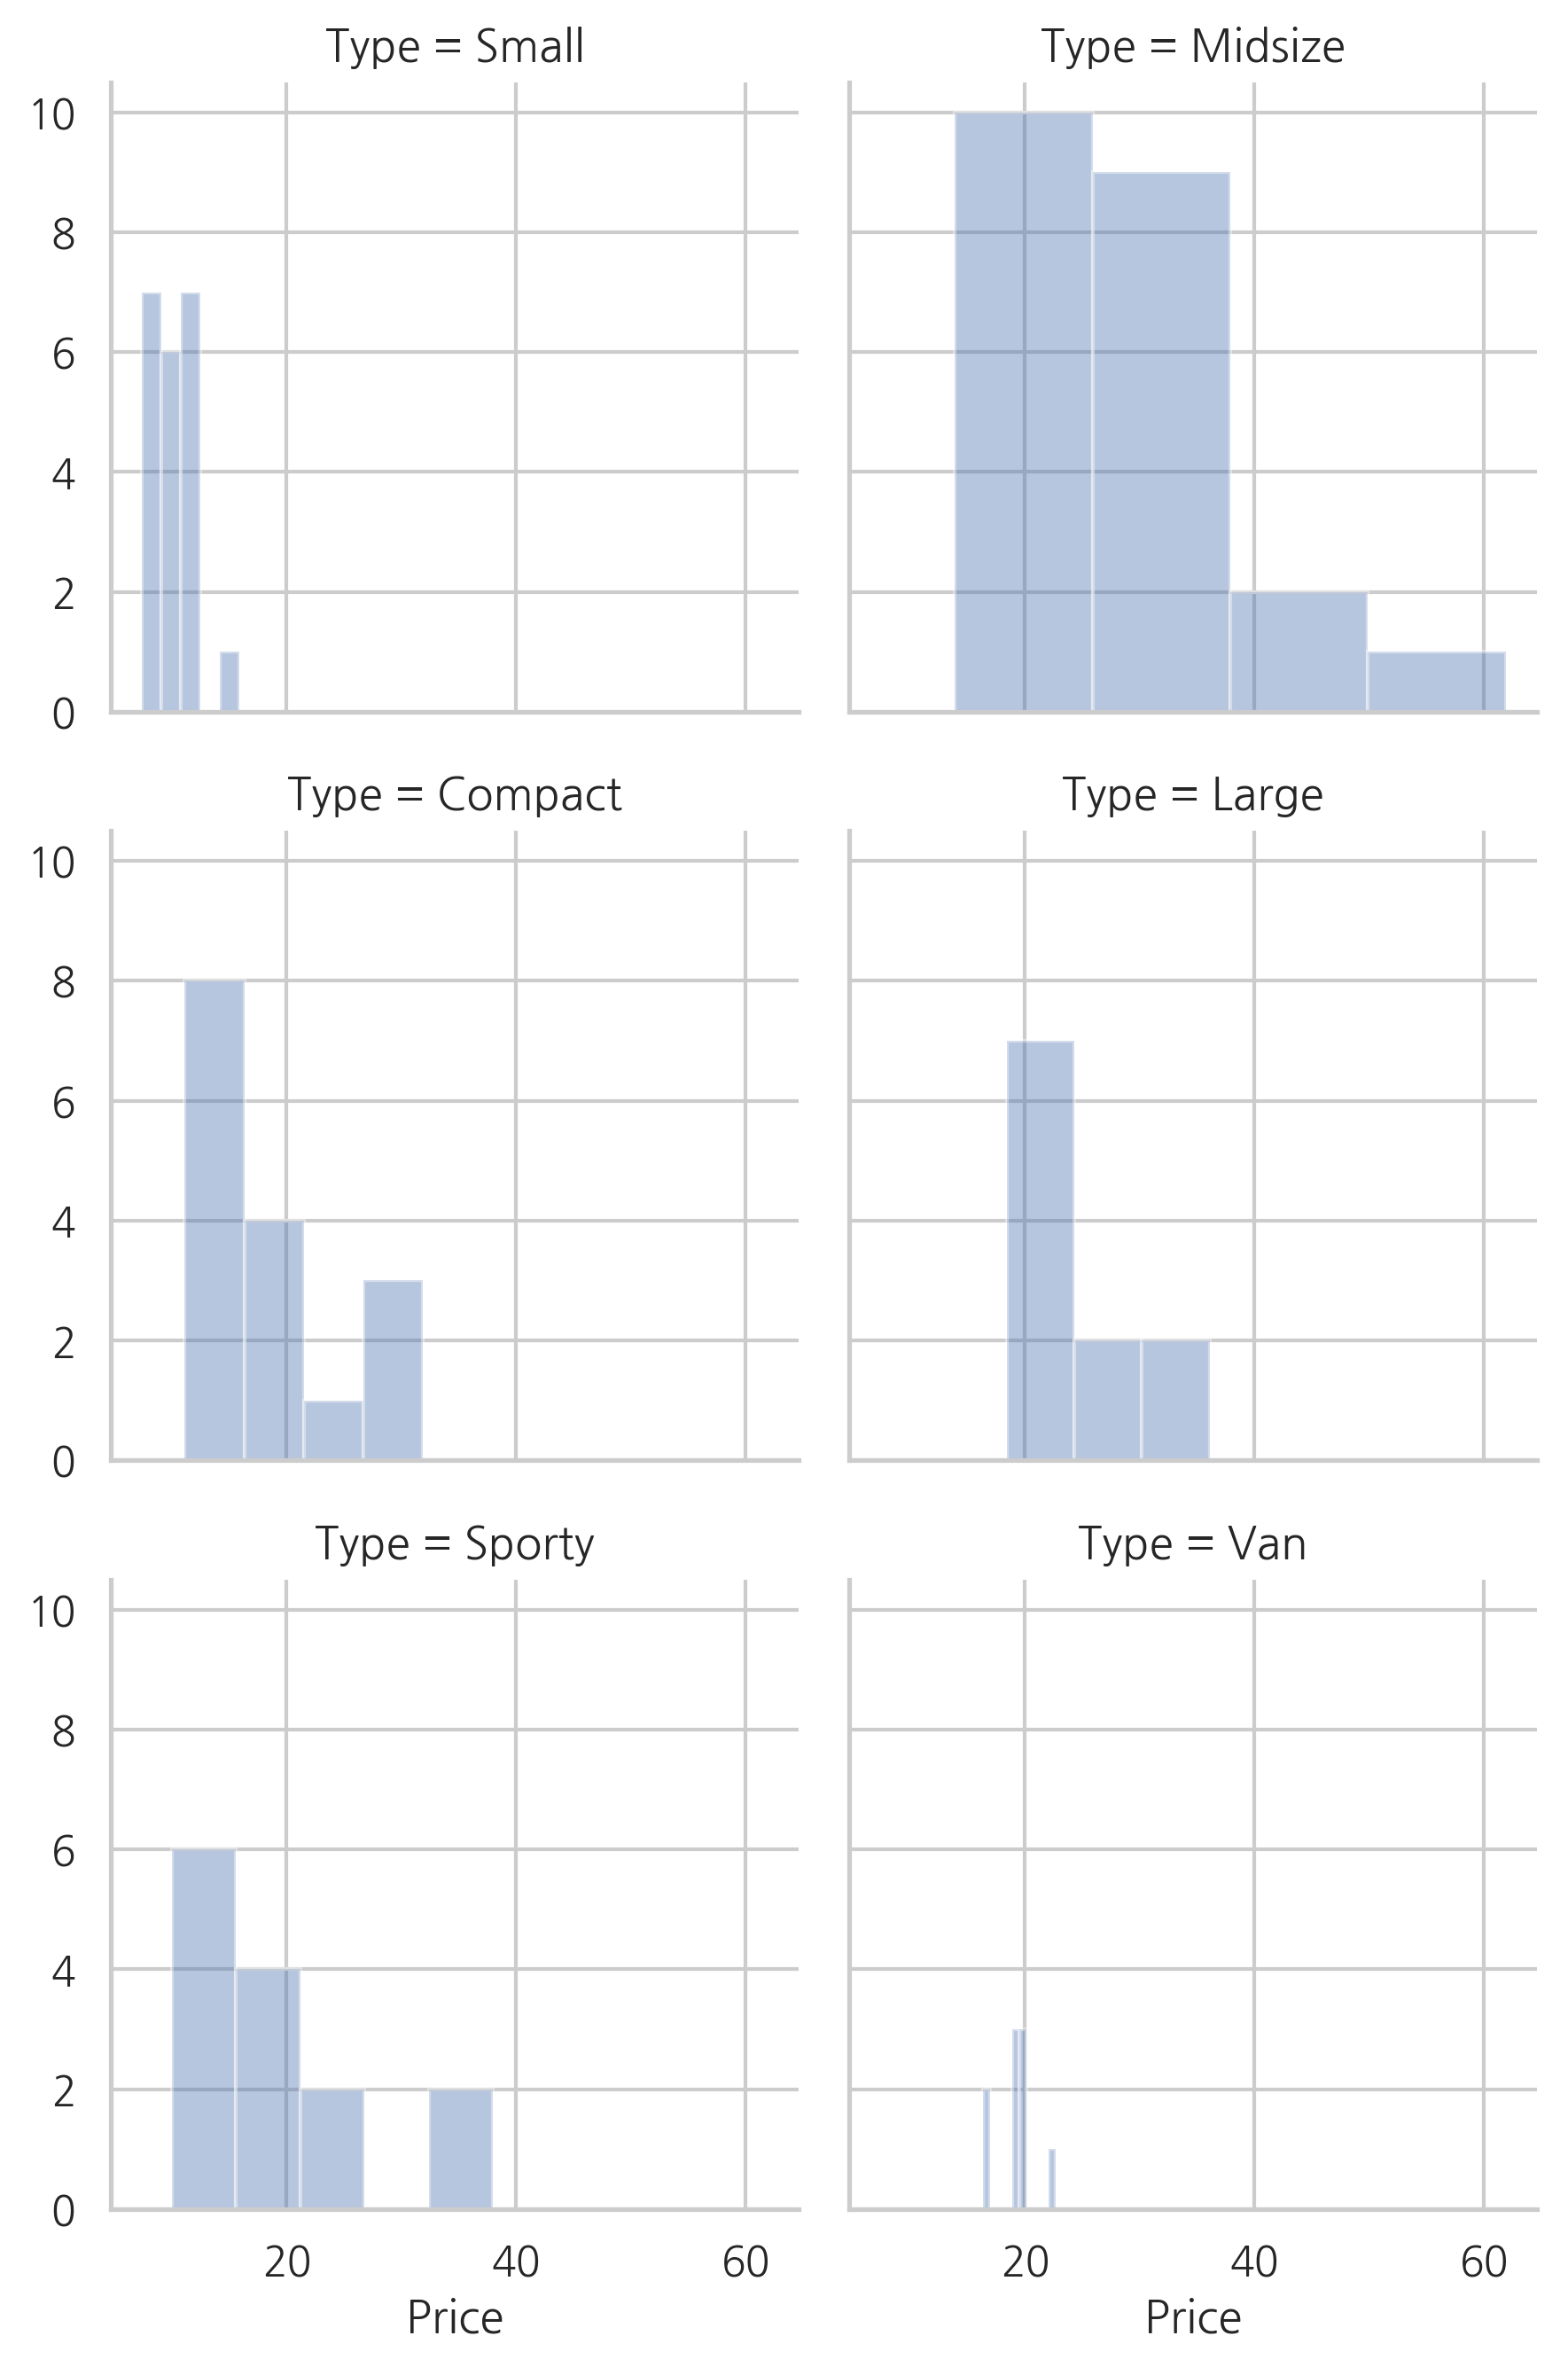

In [41]:
g = sns.FacetGrid(cars, col="Type", col_wrap=2)
g.map(sns.distplot, "Price", kde=False)

#### (1) 분산(variance)
<img src='images/Picture16.png' />

- 분산(variance)은 표준편차(standard deviation)와 함께 가장 일반적으로 사용되는 퍼짐 정도를 나타내는 통계량이다. 각 관찰값에서 평균을 빼면 평균으로부터의 거리, 편차(deviation)가 나오는데 이걸 모두 합하면 '0'이 된다. 따라서 '0'이 되지 않고 퍼진 정도를 알기 위해서 제곱(square)을 하여 합(sum)한 것이고, 관찰값 개수 N으로 나누어서 편차제곱의 평균값으로 퍼진 정도를 측정한 것이 분산(variance)이다. 표본에서 분산을 계산할 때는 편차 제곱합을 관찰값 개수 n에서 1을 뺀 n-1을 사용하여 나누어 준다.

In [85]:
np.var(cars['Price'])

92.30130419701698

In [82]:
cars.groupby('Type').agg(np.var)

,Price
Type,
Compact,44.714500
Large,40.164000
Midsize,150.426320
Small,3.815333
Sporty,63.596099
Van,3.527500


#### (2) 표준편차(standard deviation)
<img src='images/Picture17.png' />

- 표준편차는 분산에 제곱근(squared root)을 취한 값이다. 분산(variance)의 경우 편차를 제곱하다 보니 원자료의 scale과는 달라져 버리게 되어 해석하는 곤란한 상황이 벌어질 수 있다. 이 문제를 해결할 수 있는 것이 바로 표준편차이다. 편차 제곱한 분산에 제곱근을 취했기 때문에 원자료와 scale이 동일해지기 때문이다. 표준편차도 분산과 동일하게 숫자가 커질수록 중심으로부터 멀리 퍼져있다고 해석하면 되며, 원자료와 scale이 동일하기 때문에 평균에서 (정규분포의 경우) 좌우로 표준편차만큼 퍼져있다고 생각하면 이해하기가 쉽다.

In [86]:
np.std(cars['Price'])

9.607356774733463

In [90]:
cars.groupby('Type').agg(np.std)

,Price
Type,
Compact,6.686890
Large,6.337507
Midsize,12.264841
Small,1.953288
Sporty,7.974716
Van,1.878164


#### 위의 차종별 가격의 표준편차를 보면 위의 histogram과 동일한 결과가 나왔음을 알 수 있다.  Midsize가 표준편차가 12.26으로 가장 크고, Van이 1.87로 표준편차가 가장 작게 나왔다.

#### (3) 변이계수(coefficient of variation)
<img src='images/Picture18.png' />

- 위에서 표준편차(standard deviation)가 scale이 원자료와 같기 때문에 분산(variance)보다는 사용하기에 유용하다고 말하였다. 하지만 표준편차도 약점이 있는데, 절대 크기가 현저하게 달라서 평균이 서로 매우 다른 두 집단 간 비교, 측정 단위가 다른 두 변수 간 비교에는 부적합하다는 것이다. 이럴 때 퍼짐 정도를 비교 가능하도록 표준화해준 통계량이 변이계수(coefficient of variation)이다. 변이계수는 표준편차를 평균으로 나눈 다음에 100을 곱해서 계산한다.

###### 차종별 가격의 변이계수를 구하면 아래와 같다.

In [9]:
cars = pd.read_csv("data/Cars93.csv").loc[:,('Type','Price')]
#차종(Type), 가격(Price) 변수만 사용

In [10]:
cars.head()

,Type,Price
0,Small,15.9
1,Midsize,33.9
2,Compact,29.1
3,Midsize,37.7
4,Midsize,30.0


In [16]:
#변이계수 : 표준편차 / 평균 * 100
cars.groupby('Type').agg(np.std)/cars.groupby('Type').agg(np.mean)*100

,Price
Type,
Compact,36.715938
Large,26.080277
Midsize,45.061205
Small,19.212667
Sporty,41.121925
Van,9.833319


In [17]:
#비교를 위한 표준편차 값
cars.groupby('Type').agg(np.std)

,Price
Type,
Compact,6.686890
Large,6.337507
Midsize,12.264841
Small,1.953288
Sporty,7.974716
Van,1.878164


#### 변이계수의 이해를 돕기 위해 예를 하나 들어보자.

A회사와 B회사가 있는데, 한달 주식가격의 평균과 표준편차는 아래와 같다.
<img src="images/Picture19.png" />
B회사의 주당 평균 주가(mean 50,000원)는 A회사의 주당 평균주가(mean 10,000원)의 5배에 해당할만큼 큰 차이를 보이고 있다. 이럴 경우 급이 다르기 때문에 평균으로 표준편차를 나누어준 비율인 변이계수를 사용해서 동급으로 만들어주고 퍼짐 정도를 비교해야만 한다.

In [40]:
CompanyA_coe_var = 1000/10000*100
CompanyB_coe_var = 2000/50000*100
print('CompanyA_coe_var: {0:.0f}% \nCompanyB_coe_var: {1:.0f}%'
      .format(CompanyA_coe_var,CompanyB_coe_var))

CompanyA_coe_var: 10% 
CompanyB_coe_var: 4%


#### A회사의 변이계수는 10%, B회사의 변이계수는 4%로서 A회사가 B회사보다 Risk가 2.5배 더 높다고 평가할 수 있으며, 앞서의 표준편차와는 정반대의 결과가 나왔다.

#### (4) 최소값(min)
#### (5) 최대값(max)
#### (6) 범위(range)
- 범위(range)는 최대값에서 최소값을 뺀 값으로, 직관적으로 가장 이해하기 쉬운 퍼짐 정도 통계량이다. 다만, 특이값(outlier)에 민감하므로 특이값을 제거 후에 사용하거나, 아니면 특이값에 견고한 IQR(Inter Quartile Range)을 대신 사용할 수 있다.

#### (7) 백분위수(percentile)
- 제 p 백분위수(pth percentile)는 자료값 중 p%가 그 값보다 작거나 같고 (100-p)%가 그 값보다 크거나 같게 하는 값이다. Q1, Q2(median), Q3 등은 우리가 자주 사용하는 대표적인 백분위수(percentile)로서, 사분위수(quartile)라고도 하며 이때 Q1은 25% percentile, Q2는 50% percentile, Q3는 75% percentile이 된다.

#### (8) IQR(Inter Quantile Range)

<img src='images/Picture20.png' />

##### 차종별 가격의 Min, Max, 범위, 25% percentile(Q1), 75% percentile(Q3), IQR을 차례대로 구해보자.

In [41]:
cars = pd.read_csv("data/Cars93.csv").loc[:,('Type','Price')]
#차종(Type), 가격(Price) 변수만 사용

In [42]:
cars.head()

,Type,Price
0,Small,15.9
1,Midsize,33.9
2,Compact,29.1
3,Midsize,37.7
4,Midsize,30.0


In [98]:
#min 값, max 값
cars.groupby('Type').agg([np.min, np.max])

Price      
         amin  amax
Type               
Compact  11.1  31.9
Large    18.4  36.1
Midsize  13.9  61.9
Small     7.4  15.9
Sporty   10.0  38.0
Van      16.3  22.7

In [56]:
#범위 (range)
x = cars.groupby('Type').agg(np.max) - cars.groupby('Type').agg(np.min)
x.reset_index()

,Type,Price
0,Compact,20.8
1,Large,17.7
2,Midsize,48.0
3,Small,8.5
4,Sporty,28.0
5,Van,6.4


In [142]:
#Quantile 구하기 방법1
cars.groupby('Type').quantile([0.25,0.50,0.75,1.00])

Price
Type                
Compact 0.25  13.375
        0.50  16.150
        0.75  20.675
        1.00  31.900
Large   0.25  20.000
        0.50  20.900
        0.75  26.950
        1.00  36.100
Midsize 0.25  16.775
        0.50  26.200
        0.75  34.200
        1.00  61.900
Small   0.25   8.600
        0.50  10.000
        0.75  11.300
        1.00  15.900
Sporty  0.25  14.175
        0.50  16.800
        0.75  22.425
        1.00  38.000
Van     0.25  19.000
        0.50  19.100
        0.75  19.700
        1.00  22.700

In [116]:
#Quantile 구하기 방법2 (한번에 여러개 정의 가능)
def q1(x):
    return x.quantile(0.25)
def q2(x):
    return x.quantile(0.50)
def q3(x):
    return x.quantile(0.75)
def q4(x):
    return x.quantile(1.00)
f = {'Price': ['median', 'std', q1,q2, q3, q4]}
cars.groupby('Type').agg(f)

Price                                        
        median        std      q1     q2      q3    q4
Type                                                  
Compact  16.15   6.686890  13.375  16.15  20.675  31.9
Large    20.90   6.337507  20.000  20.90  26.950  36.1
Midsize  26.20  12.264841  16.775  26.20  34.200  61.9
Small    10.00   1.953288   8.600  10.00  11.300  15.9
Sporty   16.80   7.974716  14.175  16.80  22.425  38.0
Van      19.10   1.878164  19.000  19.10  19.700  22.7

In [107]:
#Quantile 구하기 방법3 (describe 에서도 보여줌)
cars.groupby('Type').describe()

Price                                                         
        count       mean        std   min     25%    50%     75%   max
Type                                                                  
Compact  16.0  18.212500   6.686890  11.1  13.375  16.15  20.675  31.9
Large    11.0  24.300000   6.337507  18.4  20.000  20.90  26.950  36.1
Midsize  22.0  27.218182  12.264841  13.9  16.775  26.20  34.200  61.9
Small    21.0  10.166667   1.953288   7.4   8.600  10.00  11.300  15.9
Sporty   14.0  19.392857   7.974716  10.0  14.175  16.80  22.425  38.0
Van       9.0  19.100000   1.878164  16.3  19.000  19.10  19.700  22.7

In [151]:
#IQR 구하기(Q3 - Q1)
iqr = cars.groupby('Type').quantile(0.75) - cars.groupby('Type').quantile(0.25)
iqr

0.75,Price
Type,
Compact,7.300
Large,6.950
Midsize,17.425
Small,2.700
Sporty,8.250
Van,0.700


In [152]:
import seaborn as sns

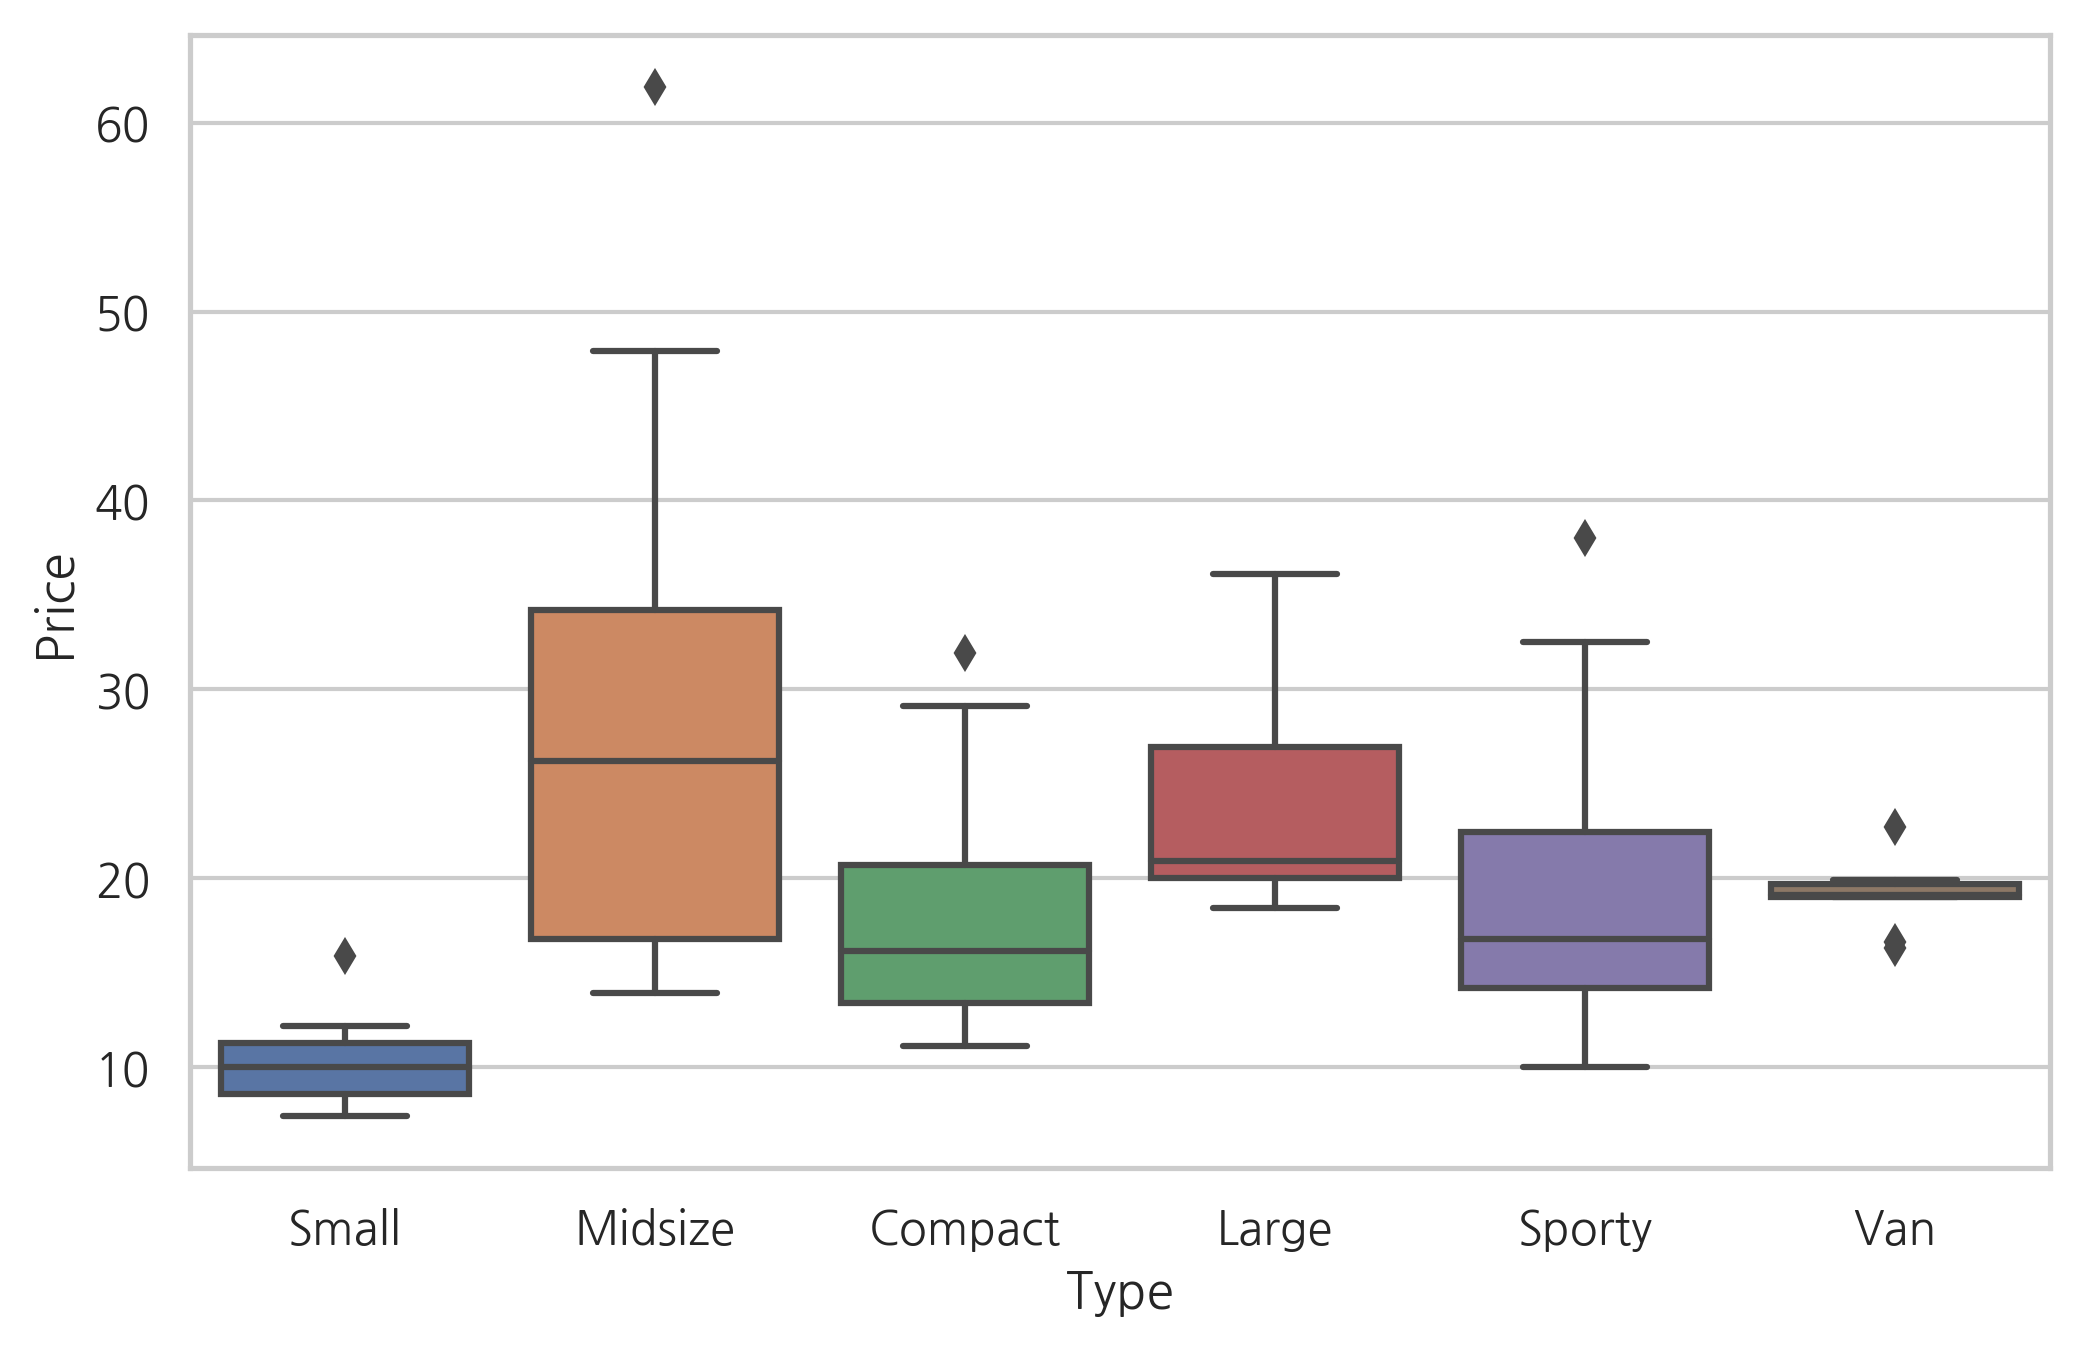

In [158]:
#위의 퍼짐 정도(range, Q1, median, Q3, lower/upper whisker line, outlier) & 
#중심 경향(mean) 관련 통계량들을 박스 그림(box-and-whisker plot)으로 그리면 
#아래와 같다.
sns.boxplot(data=cars, x='Type', y='Price')

---

### 3. 분포형태와 대칭정도(distribution and symmetry)에 대해 통계 이론과 활용상의 주의점

### 산술통계량(descriptive statistics)
<img src="images/Picture21.png" />

In [4]:
cars = pd.read_csv("data/Cars93.csv").loc[:,('Type','Price')]
#차종(Type), 가격(Price) 변수만 사용

In [5]:
import seaborn as sns

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
Type     93 non-null object
Price    93 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


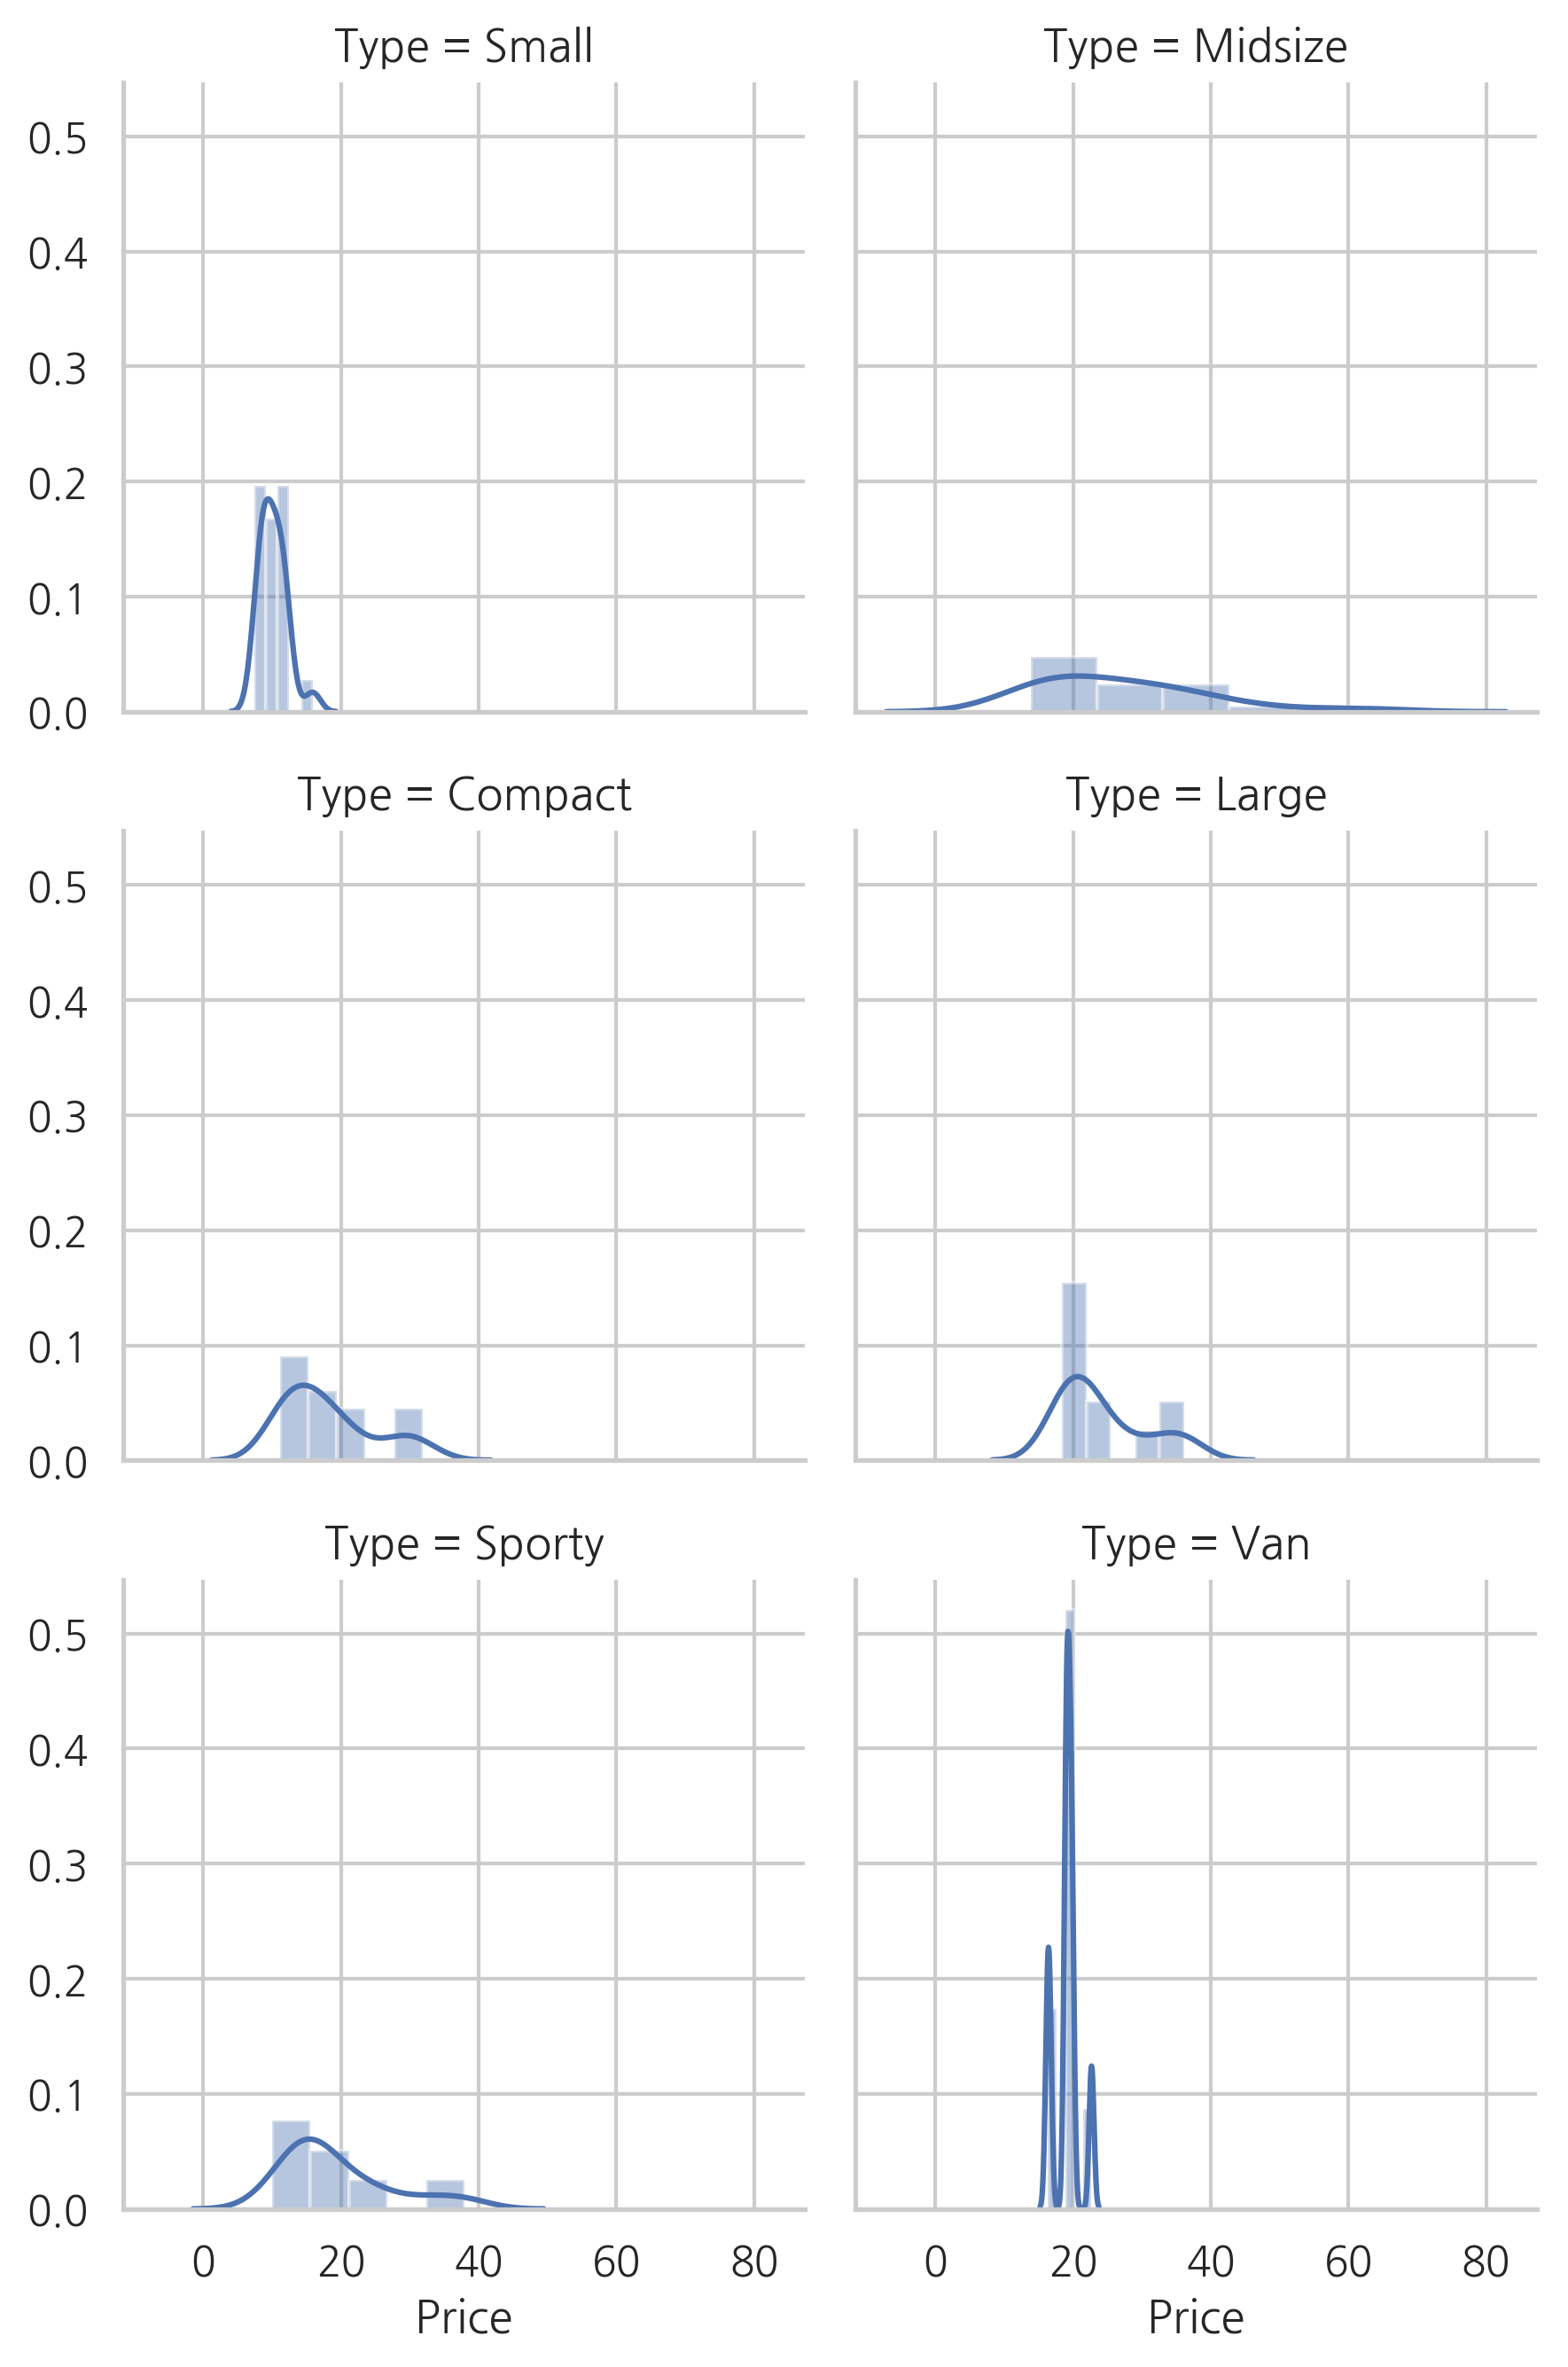

In [71]:
g = sns.FacetGrid(data=cars, col='Type', col_wrap=2, xlim=(0,60), ylim=(0,0.4))
g.map(sns.distplot, 'Price', kde=True, bins=5)

#### Histogram으로 살펴본 차종별 가격(Price by Type_의 분포는 위와 같으며, 그래프를 통해 차종별 가격의 왜도(좌우 대칭 정도)와 첨도(정규분포 대비 봉우리 높이 정도)를 가늠해 볼 수 있다.

#### (1) 왜도(skewness)
<img src='images/Picture22.png' />

- 왜도(skewness)는 자료의 대칭성을 알아보는 측도이다. 좌우 대칭형태를 띠는 정규분포는 왜도(β3) 점수가 '0' 이며, 오른쪽으로 꼬리가 긴 분포(right-skewed distribution)는 왜도 점수가 '0'보다 크며(β3 > 0), 왼쪽으로 꼬리가 긴 분포(left-skewed distribution)은 왜도 점수가 '0'보다 작다.(β3 < 0) 이는 위의 수식을 보면 기본적으로 관측값에서 평균을 뺀 값을 세제곱한 후에 더했기 때문이다.

#### 위의 Histogram을 보면 Cars의 Type별 Price를 보면 전반적으로 오른쪽으로 꼬리가 긴 형태 를 띠고 있는데, 아래의 왜도를 구한 값을 보면 모두 양수임을 알수 있으며, 특히 오른쪽으로 꼬리가 긴 Midsize와 Sporty Type은 왜도 점수가 높음을 알 수 있다. 

In [39]:
cars['Price'].skew(axis=0)

1.53308185621344

In [31]:
cars.groupby('Type').skew(axis=0)

,Price
Type,
Compact,0.950566
Large,1.096083
Midsize,1.221563
Small,1.168499
Sporty,1.292369
Van,0.239426


#### (2) 첨도(kurtosis)
<img src='images/Picture23.png' />

- 첨도(kurtosis)는 정규분포 대비 봉오리의 높이를 알아보는 측도이다. 첨도가 '0'보다 크면 (β4 > 0) 정규분포보다 뾰족하다는 의미이며, 첨도가 '0'보다 작으면 (β4 < 0) 정규분포보다 납작하다는 뜻으로 해석하면 된다. 더불어, 첨두(kurtosis, β4)는 데이터가 이봉분포(two mountaintop distribution)에 대해서 얼마나 단봉분포(one mountaiontop distribution)에 가깝게 있는가를 판단하는데도 사용한다.

#### 아래는 차종(Type)별 가격(Price)의 첨도를 계산해 놓았는데, Midsize와 Small Sporty Type이 양수로 나와서 정규분포보다 뾰족한 형태를 취하고 있다고 볼 수 있다. 
(그래프랑 값이 좀 의아하네....;;)

In [73]:
cars.kurt(axis=0)

Price    3.429123
dtype: float64

In [72]:
cars.groupby('Type').agg(pd.DataFrame.kurt)
#cars.groupby('Type').apply(pd.DataFrame.kurtosis)

,Price
Type,
Compact,-0.202760
Large,-0.186535
Midsize,1.603883
Small,2.281645
Sporty,1.124307
Van,1.220319
